# Загрузка Pandas и очистка данных

In [5]:
# Импорт необходимых библиотек
import pandas as pd
import re
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

RANDOM_SEED = 124680
df = pd.read_csv('../data/main_task.csv')

In [6]:
# Импорт собственных функций
import nbimporter
from RDS01_ML01_func import *

Importing Jupyter notebook from RDS01_ML01_func.ipynb


In [7]:
try:
    X_all_cols = pd.read_csv('../data/all_cols.csv')
except:
    # Создаем копию датафрейма и оставляем только необходимые числовые колонки
    X_all_cols = df.copy()
    X_all_cols = df.drop(['Restaurant_id', 'City', 'Cuisine Style', 'Price Range', 
                 'Reviews', 'URL_TA', 'ID_TA', 'Rating'], axis=1)

    # Сбрасываем данные в файл. Потом этот файл будем дополнять новыми признаками
    X_all_cols.to_csv('../data/all_cols.csv', index=False)

    '''После создания всех придуманных признаков, будем экспериментировать с ними: какие оставить 
    в датафрейме X, а какие убрать для получения наилучшего результата MAE'''

X_all_cols.info() #проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 143 entries, Ranking to newIsRankRangeQ4
dtypes: float64(3), int64(139), object(1)
memory usage: 43.6+ MB


- Запускаем каждую функцию ЗАПОЛНЕНИЯ / ГЕНЕРАЦИИ НОВЫХ ПРИЗНАКОВ по одному разу и потом комментируем ее вызов
- После этого проверяем корректность полученных данных
- При необходимости правим код и повторяем запуск

## ===== Заполнение пропусков =====

In [8]:
# df = fill_CuisineStyle(df)

In [9]:
# %%time
# X_all_cols = fill_NumberOfReviews(df, X_all_cols)

## ===== Генерация новых признаков =====

In [10]:
# %%time
# X_all_cols = create_IsPriceLev(df, X_all_cols) #Попадание ур. цен в ресторане в определ. диапазон

In [11]:
# %%time
# X_all_cols = create_IsCapital(df, X_all_cols) #является ли город нахождения ресторана столицей

In [12]:
# %%time
# X_all_cols = create_CS_info(df, X_all_cols) #кол-во представл. в ресторане кухонь и 
                                            #разбиение кол-ва по диапазонам

In [13]:
# %%time
# X_all_cols = create_CS_cols(df, X_all_cols) #наименование колонки по названию стиля кухни

In [14]:
# %%time
# X_all_cols = create_IsPositiveRev(df, X_all_cols) #явно позитивный отзыв

In [15]:
# %%time
# X_all_cols = create_IsChain(df, X_all_cols) #сетевой ресторан

In [16]:
# %%time
# X_all_cols = create_RankingInverse(df, X_all_cols) #обратная величина Ranking

In [17]:
# %%time
# X_all_cols = create_IsRankRange(df, X_all_cols) #диапазон попадания Ranking для каждого города

In [18]:
X_all_cols#.head()

,Ranking,Number of Reviews,newIsPriceLevMin,newIsPriceLevMdl,newIsPriceLevMax,newIsCapital,newQntyCS,newIsQntyCSeql01,newIsQntyCS02-05,newIsQntyCSgrt05,...,Ukrainian,Balti,International,newIsPositiveRev,newIsChain,RankingInverse,newIsRankRangeQ1,newIsRankRangeQ2,newIsRankRangeQ3,newIsRankRangeQ4
0,5570.0,194.0,0,1,0,1,3,0,1,0,...,0,0,1,1,1,0.000180,0,1,0,0
1,1537.0,10.0,1,0,0,1,1,1,0,0,...,0,0,0,1,1,0.000651,0,0,1,0
2,353.0,688.0,0,0,1,1,7,0,0,1,...,0,0,0,0,1,0.002833,1,0,0,0
3,3458.0,3.0,1,0,0,1,1,1,0,0,...,0,0,0,0,1,0.000289,0,0,1,0
4,621.0,84.0,0,1,0,0,3,0,1,0,...,0,0,0,1,1,0.001610,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,79.0,0,1,0,0,4,0,1,0,...,0,0,0,1,1,0.002000,1,0,0,0
39996,6341.0,542.0,0,1,0,1,5,0,1,0,...,0,0,0,1,1,0.000158,0,1,0,0
39997,1652.0,4.0,1,0,0,1,2,0,1,0,...,0,0,0,1,1,0.000605,0,0,1,0
39998,641.0,70.0,0,1,0,1,5,0,1,0,...,0,0,0,0,1,0.001560,0,1,0,0


In [19]:
X_all_cols.columns.to_list()

['Ranking',
 'Number of Reviews',
 'newIsPriceLevMin',
 'newIsPriceLevMdl',
 'newIsPriceLevMax',
 'newIsCapital',
 'newQntyCS',
 'newIsQntyCSeql01',
 'newIsQntyCS02-05',
 'newIsQntyCSgrt05',
 'Cuisine Style',
 'Italian',
 'Moroccan',
 'Hungarian',
 'Fusion',
 'Korean',
 'Gastropub',
 'Venezuelan',
 'Bar',
 'Norwegian',
 'Swiss',
 'Azerbaijani',
 'Greek',
 'Australian',
 'Mexican',
 'Peruvian',
 'New Zealand',
 'Native American',
 'Turkish',
 'Pakistani',
 'Dutch',
 'Indian',
 'Central American',
 'Filipino',
 'Bangladeshi',
 'Afghani',
 'Scandinavian',
 'Armenian',
 'Salvadoran',
 'Swedish',
 'Contemporary',
 'Tunisian',
 'Uzbek',
 'German',
 'Argentinean',
 'Vegetarian Friendly',
 'Diner',
 'Healthy',
 'Fujian',
 'Polynesian',
 'Minority Chinese',
 'Chinese',
 'British',
 'Austrian',
 'American',
 'Nepali',
 'Hawaiian',
 'Egyptian',
 'Lebanese',
 'Caucasian',
 'Malaysian',
 'European',
 'Belgian',
 'French',
 'Southwestern',
 'South American',
 'Chilean',
 'Halal',
 'Mediterranean',
 

# =========================================

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [20]:
try:
    X_all_cols = X_all_cols.drop(['Cuisine Style'], axis=1)
except:
    pass

# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
# X = X_all_cols #берем все колонки

#ver.08
# X = X_all_cols.drop(['Ranking','Number of Reviews','newQntyCS','RankingInverse'], axis=1) #или удалим часть созданных признаков

#ver.09
X = X_all_cols

y = df['Rating']

In [21]:
X.columns.to_list()

['Ranking',
 'Number of Reviews',
 'newIsPriceLevMin',
 'newIsPriceLevMdl',
 'newIsPriceLevMax',
 'newIsCapital',
 'newQntyCS',
 'newIsQntyCSeql01',
 'newIsQntyCS02-05',
 'newIsQntyCSgrt05',
 'Italian',
 'Moroccan',
 'Hungarian',
 'Fusion',
 'Korean',
 'Gastropub',
 'Venezuelan',
 'Bar',
 'Norwegian',
 'Swiss',
 'Azerbaijani',
 'Greek',
 'Australian',
 'Mexican',
 'Peruvian',
 'New Zealand',
 'Native American',
 'Turkish',
 'Pakistani',
 'Dutch',
 'Indian',
 'Central American',
 'Filipino',
 'Bangladeshi',
 'Afghani',
 'Scandinavian',
 'Armenian',
 'Salvadoran',
 'Swedish',
 'Contemporary',
 'Tunisian',
 'Uzbek',
 'German',
 'Argentinean',
 'Vegetarian Friendly',
 'Diner',
 'Healthy',
 'Fujian',
 'Polynesian',
 'Minority Chinese',
 'Chinese',
 'British',
 'Austrian',
 'American',
 'Nepali',
 'Hawaiian',
 'Egyptian',
 'Lebanese',
 'Caucasian',
 'Malaysian',
 'European',
 'Belgian',
 'French',
 'Southwestern',
 'South American',
 'Chilean',
 'Halal',
 'Mediterranean',
 'Taiwanese',
 'Alb

In [22]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [23]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

# Создаём, обучаем и тестируем модель

In [24]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [25]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100, #число деревьев в "лесу" (по дефолту – 10)
                             n_jobs=-1, #количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
                             random_state=RANDOM_SEED #начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
                            )

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [26]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#0 - MAE: 0.42803726567460315
#1 - MAE: 0.3444311738095238 / 0.35086609166666666
#2 - MAE: 0.34706674175824176 / 0.3427020345238095
#3 - MAE: 0.3475678107142857 / 0.3453844226190476
#4 - MAE: 0.3434115404761905 / 0.34369832023809516
#5 - MAE: 0.37630070396825394
#6 - MAE: 0.34400460357142854 - с функциями, без доп.анализа Ranking
#7 - MAE: 0.3438229071428572 - вместо Ranking используется RankingInverse
#8 - MAE: 0.3881737617454755 - выше указано X = ver.08
#9 - MAE: 0.2529007107142857 - выше указано X = ver.09

MAE: 0.2529007107142857


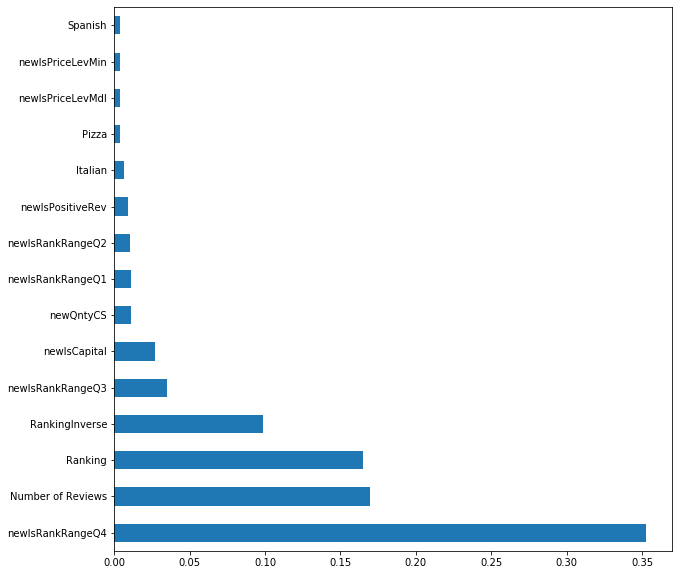

In [27]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

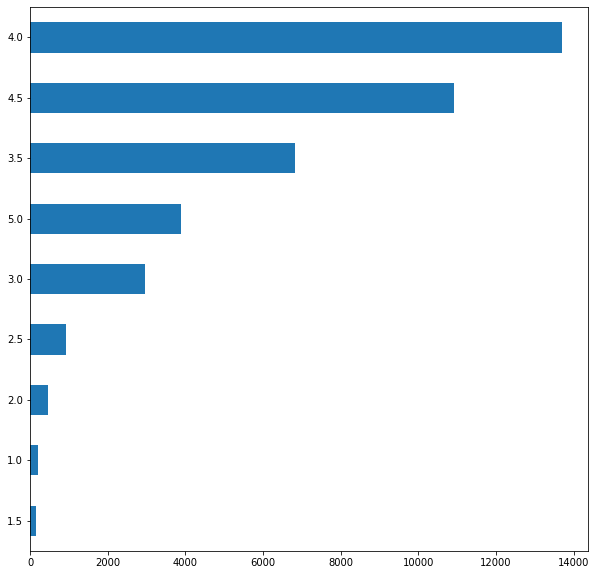

In [33]:
y.value_counts(ascending=True).plot(kind='barh')